In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/imdb_top_1000.csv")

df = data.copy()

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
df.shape

(1000, 16)

In [5]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
df.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [7]:
df.drop("Poster_Link",axis = 1, inplace=True)

In [8]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [10]:
df["Gross"].unique()

array(['28,341,469', '134,966,411', '534,858,444', '57,300,000',
       '4,360,000', '377,845,905', '107,928,762', '96,898,818',
       '292,576,195', '37,030,102', '315,544,750', '330,252,182',
       '6,100,000', '342,551,365', '171,479,930', '46,836,394',
       '290,475,067', '112,000,000', nan, '53,367,844', '188,020,017',
       '7,563,397', '10,055,859', '216,540,909', '136,801,374',
       '57,598,247', '100,125,643', '130,742,922', '322,740,140',
       '269,061', '335,451,311', '13,092,000', '13,182,281', '53,089,891',
       '132,384,315', '32,572,577', '187,705,427', '6,719,864',
       '23,341,568', '19,501,238', '422,783,777', '204,843,350',
       '11,990,401', '210,609,762', '5,321,508', '32,000,000',
       '1,024,560', '163,245', '19,181', '1,661,096', '5,017,246',
       '12,391,761', '190,241,310', '858,373,000', '678,815,482',
       '209,726,015', '162,805,434', '448,139,099', '6,532,908',
       '1,223,869', '223,808,164', '11,286,112', '707,481', '25,544,867',
 

In [11]:
df["Gross"] = df["Gross"].str.replace(",","").astype(float)

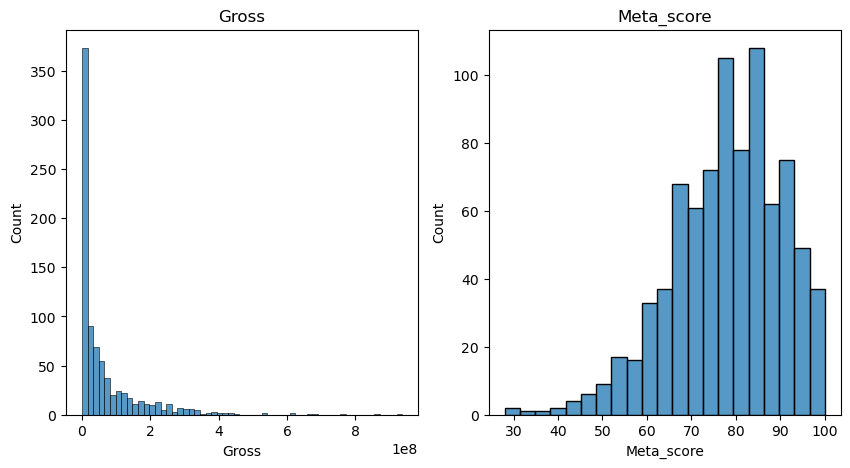

In [12]:
fig,axs = plt.subplots(1,2,figsize= (10,5))
c1 = ["Gross","Meta_score"]

for i in range(2):
    sns.histplot(data = df, x = c1[i], ax=axs[i])
    axs[i].set_title(c1[i])

plt.show()

In [13]:
for i in c1:
    df[i] = df[i].fillna(df[i].median())

for i in ["Certificate"]:
    df[i]= df[i].fillna(df[i].mode()[0])

In [14]:
df.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [15]:
df["Gross"] = df["Gross"].astype(int)

In [16]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


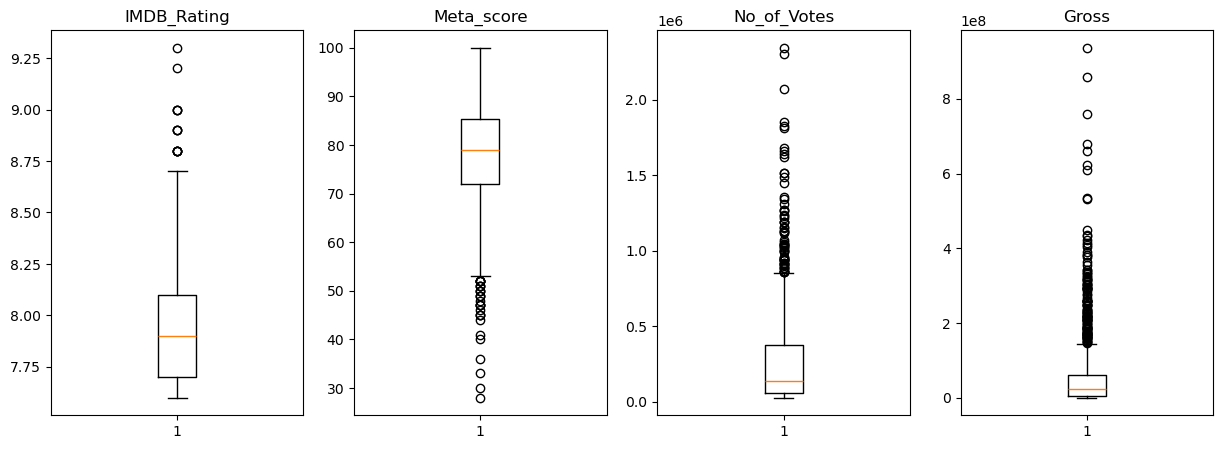

In [17]:
c2 = df.select_dtypes(["int","float"])

fig,axs = plt.subplots(1,4,figsize= (15,5))

for i in range(4):
    axs[i].boxplot(df[c2.columns[i]])
    axs[i].set_title(c2.columns[i])

In [18]:
def outliers(df,col):
    Q1 = np.percentile(df[col],25,method="midpoint")
    Q3 = np.percentile(df[col],75,method="midpoint")

    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    outlier = df[(df[col]>upper)|(df[col]<lower)]

    outlier_list = outlier[col].tolist()

    return upper,lower,outlier,outlier_list

In [19]:
upper,lower,outlier,list1 = outliers(df,"IMDB_Rating")

print(f"upperlimit = {upper}, lowerlimit = {lower}")

print(list1)

outlier.head()

upperlimit = 8.7, lowerlimit = 7.100000000000001
[9.3, 9.2, 9.0, 9.0, 9.0, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.8, 8.8]


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [20]:
upper,lower,outlier,list2 = outliers(df,"Meta_score")

print(f"upperlimit = {upper}, lowerlimit = {lower}")

print(list2)

outlier.head()

upperlimit = 105.75, lowerlimit = 51.75
[47.0, 49.0, 50.0, 33.0, 47.0, 51.0, 49.0, 51.0, 51.0, 48.0, 44.0, 50.0, 45.0, 40.0, 45.0, 47.0, 28.0, 47.0, 36.0, 46.0, 45.0, 30.0, 41.0, 49.0, 50.0]


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
272,Pink Floyd: The Wall,1982,UA,95 min,"Drama, Fantasy, Music",8.1,A confined but troubled rock star descends int...,47.0,Alan Parker,Bob Geldof,Christine Hargreaves,James Laurenson,Eleanor David,76081,22244207
342,Bohemian Rhapsody,2018,UA,134 min,"Biography, Drama, Music",8.0,The story of the legendary British rock band Q...,49.0,Bryan Singer,Rami Malek,Lucy Boynton,Gwilym Lee,Ben Hardy,450349,216428042
352,My Name Is Khan,2010,UA,165 min,Drama,8.0,An Indian Muslim man with Asperger's syndrome ...,50.0,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon,Katie A. Keane,98575,4018695
356,Tropa de Elite,2007,R,115 min,"Action, Crime, Drama",8.0,"In 1997 Rio de Janeiro, Captain Nascimento has...",33.0,José Padilha,Wagner Moura,André Ramiro,Caio Junqueira,Milhem Cortaz,98097,8060
397,Bound by Honor,1993,R,180 min,"Crime, Drama",8.0,Based on the true life experiences of poet Jim...,47.0,Taylor Hackford,Damian Chapa,Jesse Borrego,Benjamin Bratt,Enrique Castillo,28825,4496583


In [22]:
upper,lower,outler,list3  = outliers(df,"No_of_Votes")

print(f"upperlimit = {upper}, lowerlimit = {lower}")

print(list3)

outlier.head()


upperlimit = 852986.5, lowerlimit = -423037.5
[2343110, 1620367, 2303232, 1129952, 1642758, 1826188, 1213505, 2067042, 1854740, 1661481, 1809221, 1485555, 1676426, 1020727, 1159315, 918088, 1512360, 1235804, 1147794, 1445096, 1270197, 1231473, 939252, 1190259, 1189773, 1341460, 1034705, 991208, 1035236, 942045, 995506, 1058081, 1357682, 1516346, 999790, 1125712, 884112, 898237, 1267869, 911664, 1069738, 861606, 887429, 959181, 918562, 950470, 1129894, 935507, 1187498, 1032749, 1308302, 859695, 882316, 856916, 1000639, 949565, 911573, 939631, 867615, 1043455, 902669, 1260806, 1015122, 860823, 939644, 1118998, 1046089]


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
272,Pink Floyd: The Wall,1982,UA,95 min,"Drama, Fantasy, Music",8.1,A confined but troubled rock star descends int...,47.0,Alan Parker,Bob Geldof,Christine Hargreaves,James Laurenson,Eleanor David,76081,22244207
342,Bohemian Rhapsody,2018,UA,134 min,"Biography, Drama, Music",8.0,The story of the legendary British rock band Q...,49.0,Bryan Singer,Rami Malek,Lucy Boynton,Gwilym Lee,Ben Hardy,450349,216428042
352,My Name Is Khan,2010,UA,165 min,Drama,8.0,An Indian Muslim man with Asperger's syndrome ...,50.0,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon,Katie A. Keane,98575,4018695
356,Tropa de Elite,2007,R,115 min,"Action, Crime, Drama",8.0,"In 1997 Rio de Janeiro, Captain Nascimento has...",33.0,José Padilha,Wagner Moura,André Ramiro,Caio Junqueira,Milhem Cortaz,98097,8060
397,Bound by Honor,1993,R,180 min,"Crime, Drama",8.0,Based on the true life experiences of poet Jim...,47.0,Taylor Hackford,Damian Chapa,Jesse Borrego,Benjamin Bratt,Enrique Castillo,28825,4496583


In [23]:
upper,lower,outlier,list4 = outliers(df,"Gross")

print(f"upperlimit = {upper}, lowerlimit = {lower}")

print(list4)

outlier.head()

upperlimit = 146423653.5, lowerlimit = -79835250.5
[534858444, 377845905, 292576195, 315544750, 330252182, 342551365, 171479930, 290475067, 188020017, 216540909, 322740140, 335451311, 187705427, 422783777, 204843350, 210609762, 190241310, 858373000, 678815482, 209726015, 162805434, 448139099, 223808164, 248159971, 159227644, 191796233, 309125409, 159600000, 293004164, 415004880, 206852432, 170742341, 197171806, 226277068, 167767189, 356461711, 154058340, 148095302, 381011219, 217581231, 380843261, 164615351, 289916256, 293506292, 402453882, 198676459, 151101803, 228433663, 341268248, 333176600, 216428042, 183637894, 169708112, 363070709, 623279547, 163566459, 227471070, 206445654, 167445960, 305413918, 261441092, 217350219, 218967620, 184208848, 178800000, 260000000, 232906145, 163214286, 165359751, 315058289, 936662225, 233921534, 257730019, 318412101, 249358727, 245852179, 188373161, 169607287, 532177324, 408084349, 222527828, 434038008, 177002924, 161197785, 258366855, 303003568, 76

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905
8,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195
10,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750
11,Forrest Gump,1994,UA,142 min,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",82.0,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,330252182


In [25]:
df["Released_Year"].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [29]:
mode = df["Released_Year"].mode()[0]

df["Released_Year"] = df["Released_Year"].replace("PG",mode)

In [31]:
df["Released_Year"] =df["Released_Year"].astype(int)

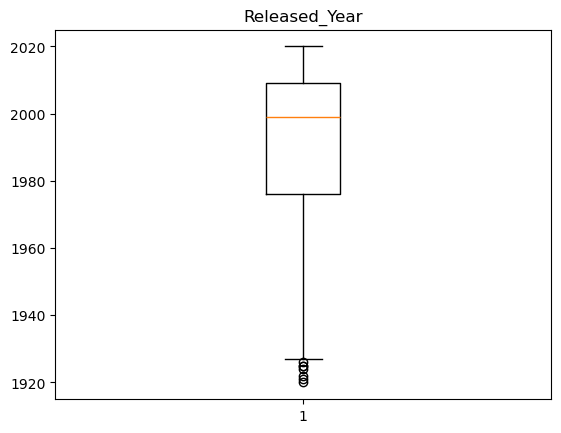

In [33]:
plt.boxplot(data = df, x = "Released_Year")
plt.title("Released_Year")
plt.show()

In [36]:
upper,lower,outlier,list5 = outliers(df,"Released_Year")

print(f"upperlimit = {upper}, lowerlimit = {lower}")
print(list5)
outlier.head()

upperlimit = 2058.5, lowerlimit = 1926.5
[1921, 1925, 1924, 1926, 1920, 1925, 1922]


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
127,The Kid,1921,Passed,68 min,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",79.0,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,5450000
193,The Gold Rush,1925,Passed,95 min,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,79.0,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,5450000
194,Sherlock Jr.,1924,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",79.0,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,977375
320,The General,1926,Passed,67 min,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,79.0,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1033895
321,Das Cabinet des Dr. Caligari,1920,U,76 min,"Fantasy, Horror, Mystery",8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",79.0,Robert Wiene,Werner Krauss,Conrad Veidt,Friedrich Feher,Lil Dagover,57428,23530892


In [37]:
c5 = df.select_dtypes("object")

c5.head()

,Series_Title,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4
0,The Shawshank Redemption,A,142 min,Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Godfather,A,175 min,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,The Dark Knight,UA,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,The Godfather: Part II,A,202 min,"Crime, Drama",The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,12 Angry Men,U,96 min,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
